# Project Name - Online Retail Customer Segmentation

# Project Type - Unsupervised Machine Learning

# Contribution - Individual

# Name - Tushar Raskar

# GitHub Link

https://github.com/tusharraskar/Online-Retail-Customer-Segmentation.git

# Problem Statement

### Business Problem Overview

The business problem for the Netflix Movies and TV Shows Clustering project is to understand the customer preferences and trends in terms of the content they watch on the streaming platform. 

This information can be used by Netflix to improve their recommendations for users and to make informed decisions about acquiring or producing new content. 

By clustering movies and TV shows based on their features and attributes, such as genre, director, actors, and plot, Netflix can gain insights into what types of content are popular among their customers and use this information to shape their content strategy.

### Business Objective

The objective of this project is to utilize data clustering techniques to group and categorize the available movies and TV shows on Netflix into meaningful and relevant clusters. 

This project aims to help Netflix improve its content recommendations for its users and to better understand the preferences and trends in the entertainment industry. 

This project also aims to assist Netflix in content acquisition and curation by identifying popular genres and themes among its users.

In [1]:
# Import Libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Dataset Loading
data = pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
# Viewing data's first 5 row

data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
# Chicking shape of data

data.shape

(7787, 12)

#### Data has 7787 rows and 12 columns.

In [21]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the movie/show

director : Director of the show

cast : Actors involved

Country : Country of production

date_added : Date it was added on Netflix

release_year : Actual release year of the show

rating : TV rating of the show

duration : Total duration in minutes or number of seasons

listed_ in : Genre

Description : The summary description

In [20]:
# Duplicate Values
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


#### In that dataset there is no duplicated values are there.

In [5]:
# Checking data types

data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Ckechking null or missing values

In [11]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

##### In our data there is null valuse in
1. director=2389,
2. cast =718,
3. country=507,
4. date_added=10.

## Checking unique values in each feature

In [12]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## Data Describe

In [13]:
data.describe() 

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [14]:
# Creating copy of the current data and assigning to df
df=data.copy()

### Here I required Feature Engineering for EDA

## Feature engineering

In [23]:
df['listed_in'].value_counts() 

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

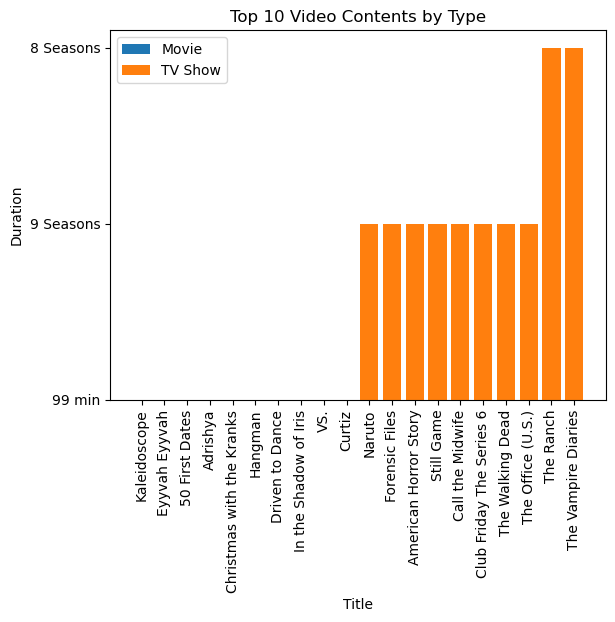

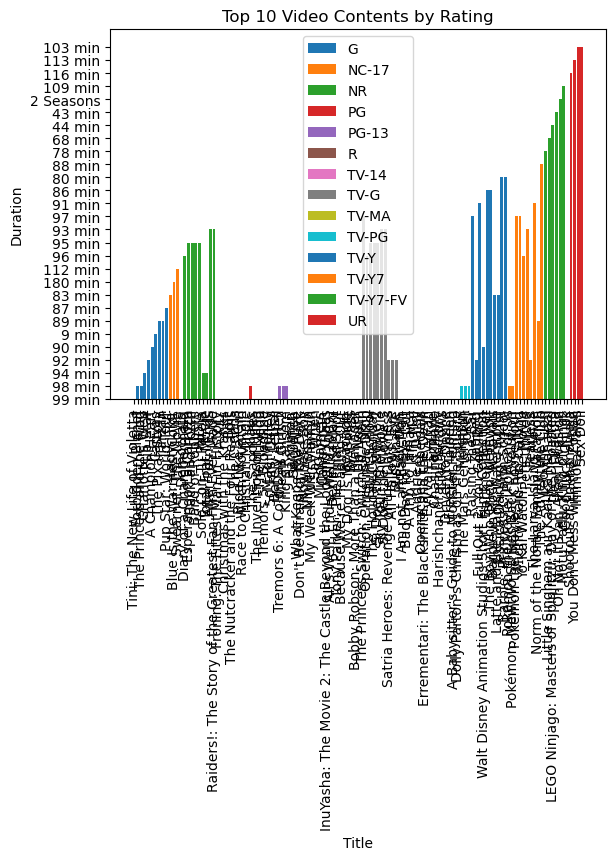

In [19]:
# Group the data by type and rating
grouped_by_type = df.groupby('type')
grouped_by_rating = df.groupby('rating')

# Plot the Top 10 video contents in each type
for name, group in grouped_by_type:
    top_10 = group.sort_values(by='duration', ascending=False).head(10)
    plt.bar(top_10['title'], top_10['duration'], label=name)

plt.legend()
plt.xlabel('Title')
plt.ylabel('Duration')
plt.title('Top 10 Video Contents by Type')
plt.xticks(rotation=90)
plt.show()

# Plot the Top 10 video contents in each rating
for name, group in grouped_by_rating:
    top_10 = group.sort_values(by='duration', ascending=False).head(10)
    plt.bar(top_10['title'], top_10['duration'], label=name)

plt.legend()
plt.xlabel('Title')
plt.ylabel('Duration')
plt.title('Top 10 Video Contents by Rating')
plt.xticks(rotation=90)
plt.show()